# Imports

In [1]:
import pandas as pd
import psycopg2

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Read Data Set

In [2]:
df = pd.read_csv("mergeData_v6_with_scenario_data.csv")
df.head()

,speed_total_mean,steering_total_mean,brake_total_mean,throttle_total_mean,acceleration_total_mean,speed_total_var,steering_total_var,brake_total_var,throttle_total_var,acceleration_total_var,...,distancePed,max_speed,PKE,PKE_Steering,speed_react,reaction_time,pedestriansLevel,visibilityLevel,trafficLevel,hadCollision
0,5.919151,0.503649,0.965743,0.820576,0.030731,13.796202,0.000655,0.014468,0.028719,0.039370,...,89.992450,11.669766,1.932290,-0.000150,7.754880,1.048791,0,1,0,0
1,7.580378,0.499771,0.891302,0.878839,-0.026652,31.451253,0.000345,0.058767,0.010391,0.063480,...,85.063860,13.499710,0.878493,0.000274,13.472353,2.106615,0,1,0,0
2,9.474048,0.494557,0.952182,0.781126,0.006292,53.873833,0.001231,0.022506,0.045416,0.106281,...,789.212800,25.851397,2.857169,0.000108,25.585112,0.079211,0,1,0,1
3,11.669419,0.500661,0.891913,0.522365,0.008028,47.209285,0.000396,0.055982,0.112551,0.159198,...,88.011610,20.055070,2.969647,-0.000258,19.412087,1.161592,2,1,0,0
4,12.187044,0.499769,0.861132,0.558120,0.001881,42.031423,0.000430,0.102442,0.079023,0.158822,...,105.973686,19.697004,4.033468,0.000066,18.461056,1.275896,2,1,0,0


### Distribution

In [3]:
num_obs = len(df)
num_true = len(df.loc[df['hadCollision'] == 1])
num_false = len(df.loc[df['hadCollision'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  54 (9.66%)
Number of False cases: 505 (90.34%)


## Split data set

In [4]:
from sklearn.model_selection import train_test_split

data = df.copy()
X = data.drop('hadCollision', axis=1) 
Y = data['hadCollision']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

## KNN classifier (n = 3)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
#check accuracy of our model on the test data
from sklearn import metrics

print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.8928571428571429
Confusion Matrix
[[98  3]
 [ 9  2]]

Classification Report
             precision    recall  f1-score   support

          0       0.92      0.97      0.94       101
          1       0.40      0.18      0.25        11

avg / total       0.87      0.89      0.87       112



Baja certeza para casos verdaderos de choque

## KNN classifier (n = 5)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.8928571428571429
Confusion Matrix
[[99  2]
 [10  1]]

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.98      0.94       101
          1       0.33      0.09      0.14        11

avg / total       0.85      0.89      0.86       112



Nula certeza para casos verdaderos de choque

## KNN classifier (n = 7)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [10]:
print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.8928571428571429
Confusion Matrix
[[100   1]
 [ 11   0]]

Classification Report
             precision    recall  f1-score   support

          0       0.90      0.99      0.94       101
          1       0.00      0.00      0.00        11

avg / total       0.81      0.89      0.85       112



## KNN classifier (n = 11)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 11)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [12]:
print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.9017857142857143
Confusion Matrix
[[101   0]
 [ 11   0]]

Classification Report
             precision    recall  f1-score   support

          0       0.90      1.00      0.95       101
          1       0.00      0.00      0.00        11

avg / total       0.81      0.90      0.86       112



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## KNN with cv score

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.92857143 0.90178571 0.90178571 0.91071429 0.89189189]
cv_scores mean:0.9069498069498069


## GridSearchCV n neighbors

In [14]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 2}

In [16]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9087656529516994

## KNN classifier (n = 2)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [18]:
print(knn.score(X_test, y_test))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn.predict(X_test))))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, knn.predict(X_test)))

0.9017857142857143
Confusion Matrix
[[100   1]
 [ 10   1]]

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.99      0.95       101
          1       0.50      0.09      0.15        11

avg / total       0.87      0.90      0.87       112



Resultados parecidos a n = 3

## Decision Tree

In [19]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Defining and fitting a DecisionTreeClassifier instance
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

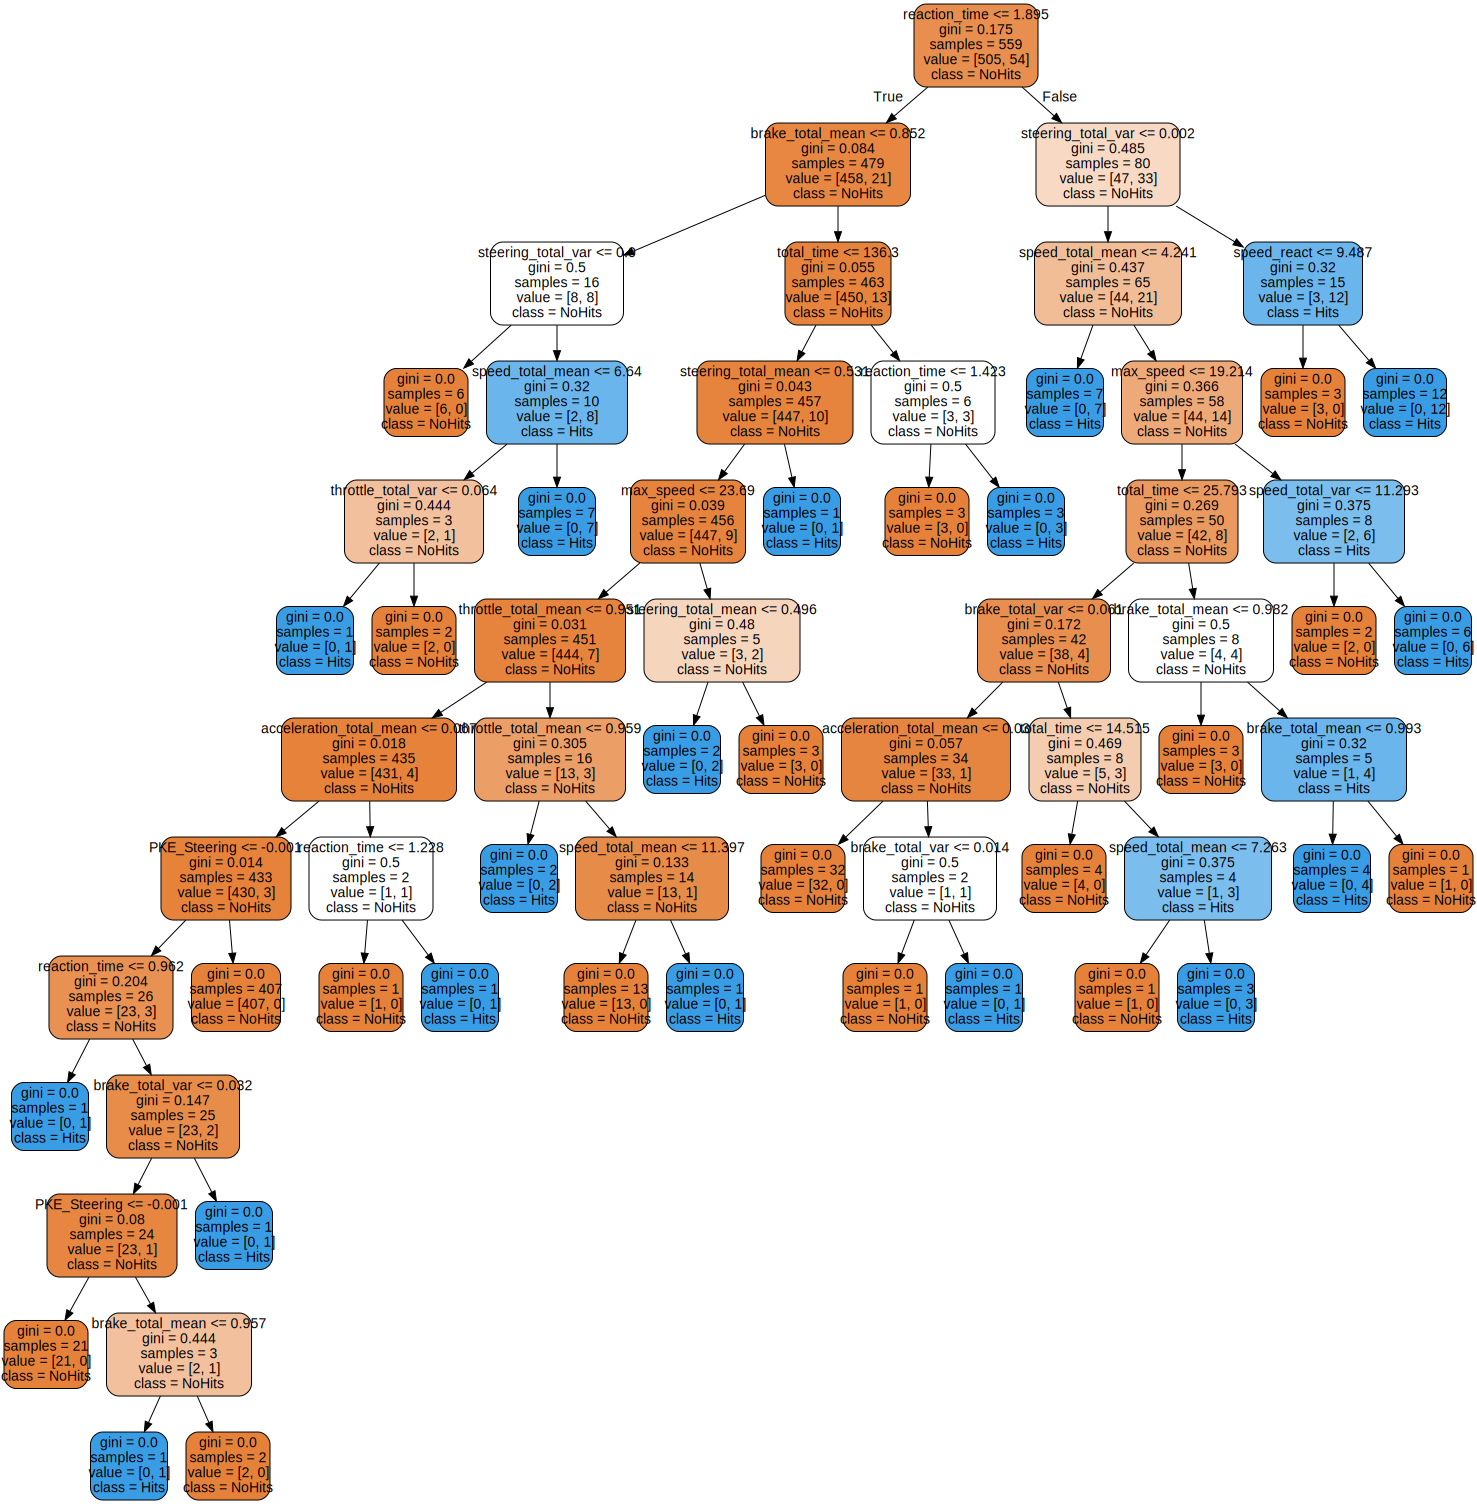

In [20]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf, out_file="mytree.dot",
                feature_names = list(X.columns),
                class_names = ["NoHits", "Hits"],
                filled = True,
                rounded = True)

with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

speed_total_mean 0.1210167053240628
steering_total_mean 0.04425289980915627
brake_total_mean 0.07060460550204083
throttle_total_mean 0.02909189305096022
acceleration_total_mean 0.04262896375627148
speed_total_var 0.015374037403740373
steering_total_var 0.13676980198019806
brake_total_var 0.03498706009723288
throttle_total_var 0.016682801613494693
acceleration_total_var 0.023915169294707248
total_time 0.06398523966768846
distancePed 0.01024935826916025
max_speed 0.06419594386585194
PKE 0.04919691969196918
PKE_Steering 0.030721466655261796
speed_react 0.0245984598459846
reaction_time 0.22172867417221903
pedestriansLevel 0.0
visibilityLevel 0.0
trafficLevel 0.0


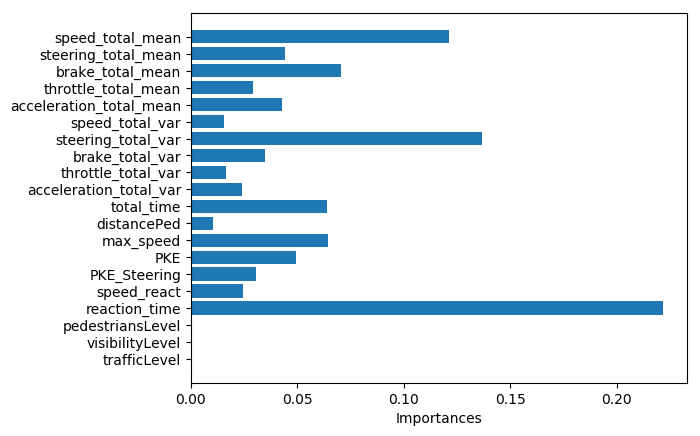

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X, Y)

for name, importance in zip(X.columns, classifier.feature_importances_):
    print(name, importance)
    
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

ax.barh(X.columns, classifier.feature_importances_, align='center')
ax.set_yticks(X.columns)
ax.set_yticklabels(X.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importances')

plt.show()

### With max depth and min samples per leaf

In [22]:
treeMaxDepth = DecisionTreeClassifier( max_depth=3, min_samples_leaf=5, random_state=100)
treeMaxDepth = treeMaxDepth.fit(X, Y)

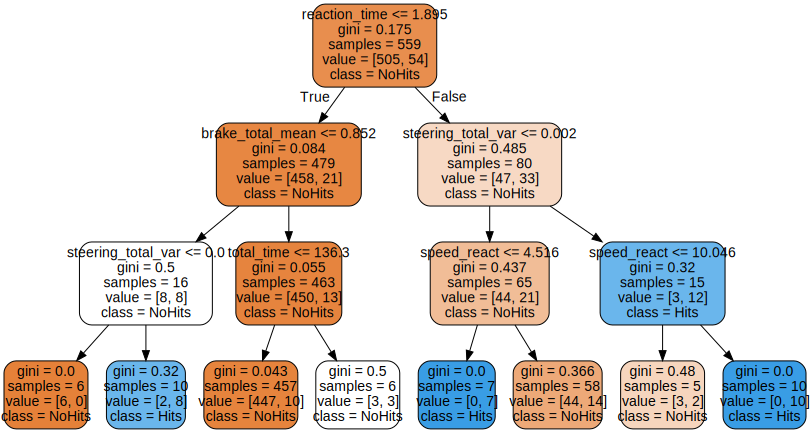

In [23]:
export_graphviz(treeMaxDepth, out_file="mytree2.dot",
                feature_names = list(X.columns),
                class_names = ["NoHits", "Hits"],
                filled = True,
                rounded = True)

with open("mytree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Predictions

In [24]:
from sklearn.metrics import accuracy_score 


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

0.8839285714285714
Confusion Matrix
[[96  5]
 [ 8  3]]

Classification Report
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       101
          1       0.38      0.27      0.32        11

avg / total       0.87      0.88      0.88       112



Mejoró un poco en el recall pero poca precisión

#### With max depth and min samples per leaf

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

0.8839285714285714
Confusion Matrix
[[96  5]
 [ 8  3]]

Classification Report
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       101
          1       0.38      0.27      0.32        11

avg / total       0.87      0.88      0.88       112



#### With entropy

In [26]:
clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

0.9017857142857143
Confusion Matrix
[[98  3]
 [ 8  3]]

Classification Report
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       101
          1       0.50      0.27      0.35        11

avg / total       0.88      0.90      0.89       112



## Random forest

### Re-Distribution

In [27]:
num_obs = len(df)
num_true = len(df.loc[df['hadCollision'] == 1])
num_false = len(df.loc[df['hadCollision'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  54 (9.66%)
Number of False cases: 505 (90.34%)


In [28]:
positives = df.loc[df['hadCollision'] == 1].copy()
negatives = df.loc[df['hadCollision'] == 0].copy()

In [29]:
X_train_pos, X_test_pos = train_test_split(positives, train_size=40, random_state=1)
X_train_neg, X_test_neg = train_test_split(negatives, train_size=40, random_state=1)
X_train_total = X_train_pos.append(X_train_neg)
X_test_total = X_test_pos.append(X_test_neg)

X_train_total = X_train_total.sample(frac=1).reset_index(drop=True)
X_test_total = X_test_total.sample(frac=1).reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
X_train_total.shape

(80, 21)

In [31]:
X_test_total.shape

(479, 21)

40 and 40 cases from each class to train, and the rest to test

In [32]:
X_train = X_train_total.drop('hadCollision', axis=1) 
y_train = X_train_total['hadCollision']

X_test = X_test_total.drop('hadCollision', axis=1) 
y_test = X_test_total['hadCollision']

In [33]:
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Training True  : 40 (50.00%)
Training False : 40 (50.00%)

Test True      : 14 (2.92%)
Test False     : 465 (97.08%)


**Esto es lo que habiamos hablado en la última reunion**

## Random Forest Apply

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [35]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9875


### Predict Test Data

In [36]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.8163


In [37]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[380  85]
 [  3  11]]

Classification Report
             precision    recall  f1-score   support

          0       0.99      0.82      0.90       465
          1       0.11      0.79      0.20        14

avg / total       0.97      0.82      0.88       479



Mejoró mucho el recall pero bajó la precisión en los verdaderos.